In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle
from torch.utils.data import WeightedRandomSampler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
fr = pd.read_csv("Fundraising.csv")
fr

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1,1,No,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,Donor
1,No,No,No,Yes,No,2,5,Yes,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,Donor
2,No,No,No,Yes,Yes,1,3,No,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,No Donor
3,No,Yes,No,No,Yes,1,4,No,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,No Donor
4,No,Yes,No,No,Yes,1,4,Yes,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,No,No,Yes,No,Yes,1,5,Yes,4,882,...,374,21,46,111.0,22.0,9.0,36,5,9.250000,No Donor
2996,No,No,No,Yes,Yes,1,5,No,7,2085,...,494,9,55,93.0,15.0,15.0,29,3,9.300000,No Donor
2997,No,No,No,Yes,Yes,3,7,Yes,2,897,...,334,16,57,162.0,20.0,20.0,29,15,14.727273,No Donor
2998,No,No,No,Yes,No,1,2,Yes,5,429,...,360,15,54,80.0,10.0,10.0,32,1,8.000000,No Donor


In [64]:
# Count the number of donors and non-donors in the dataset
donor_counts = fr['target'].value_counts()

# Display the counts
print(donor_counts)

No Donor    1501
Donor       1499
Name: target, dtype: int64


In [65]:
frf = pd.read_csv("future_fundraising.csv")
frf

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
0,No,Yes,No,No,Yes,1,5,Yes,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143
1,Yes,No,No,No,Yes,1,1,No,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923
2,No,No,No,Yes,Yes,1,4,Yes,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828
3,No,No,Yes,No,Yes,1,4,No,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000
4,No,Yes,No,No,Yes,1,2,Yes,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,No,Yes,No,No,Yes,1,6,Yes,8,1126,609,657,3,18,25.0,25.0,25.0,37,5,25.000000
116,No,Yes,No,No,Yes,1,4,No,2,604,259,295,23,56,80.0,5.0,5.0,33,2,2.962963
117,No,No,No,Yes,No,1,2,No,8,412,240,299,25,61,238.0,25.0,25.0,19,0,21.636364
118,No,No,Yes,No,Yes,1,5,No,8,1207,601,594,0,46,105.0,15.0,10.0,29,7,10.500000


In [66]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   object 
 1   zipconvert3          3000 non-null   object 
 2   zipconvert4          3000 non-null   object 
 3   zipconvert5          3000 non-null   object 
 4   homeowner            3000 non-null   object 
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   object 
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  med_fam_inc          3000 non-null   int64  
 11  avg_fam_inc          3000 non-null   int64  
 12  pct_lt15k            3000 non-null   int64  
 13  num_prom             3000 non-null   int64  
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [67]:
frf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    object 
 1   zipconvert3          120 non-null    object 
 2   zipconvert4          120 non-null    object 
 3   zipconvert5          120 non-null    object 
 4   homeowner            120 non-null    object 
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    object 
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

In [68]:
fr['zipconvert2'] = fr['zipconvert2'].map({'Yes': 1, 'No': 0})
fr['zipconvert3'] = fr['zipconvert3'].map({'Yes': 1, 'No': 0})
fr['zipconvert4'] = fr['zipconvert4'].map({'Yes': 1, 'No': 0})
fr['zipconvert5'] = fr['zipconvert5'].map({'Yes': 1, 'No': 0})
fr['homeowner'] = fr['homeowner'].map({'Yes': 1, 'No': 0})
fr['female'] = fr['female'].map({'Yes': 1, 'No': 0})
fr['target'] = fr['target'].map({'Donor': 1, 'No Donor': 0})
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   int64  
 1   zipconvert3          3000 non-null   int64  
 2   zipconvert4          3000 non-null   int64  
 3   zipconvert5          3000 non-null   int64  
 4   homeowner            3000 non-null   int64  
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   int64  
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  med_fam_inc          3000 non-null   int64  
 11  avg_fam_inc          3000 non-null   int64  
 12  pct_lt15k            3000 non-null   int64  
 13  num_prom             3000 non-null   int64  
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [69]:
frf['zipconvert2'] = frf['zipconvert2'].map({'Yes': 1, 'No': 0})
frf['zipconvert3'] = frf['zipconvert3'].map({'Yes': 1, 'No': 0})
frf['zipconvert4'] = frf['zipconvert4'].map({'Yes': 1, 'No': 0})
frf['zipconvert5'] = frf['zipconvert5'].map({'Yes': 1, 'No': 0})
frf['homeowner'] = frf['homeowner'].map({'Yes': 1, 'No': 0})
frf['female'] = frf['female'].map({'Yes': 1, 'No': 0})
frf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    int64  
 1   zipconvert3          120 non-null    int64  
 2   zipconvert4          120 non-null    int64  
 3   zipconvert5          120 non-null    int64  
 4   homeowner            120 non-null    int64  
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    int64  
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

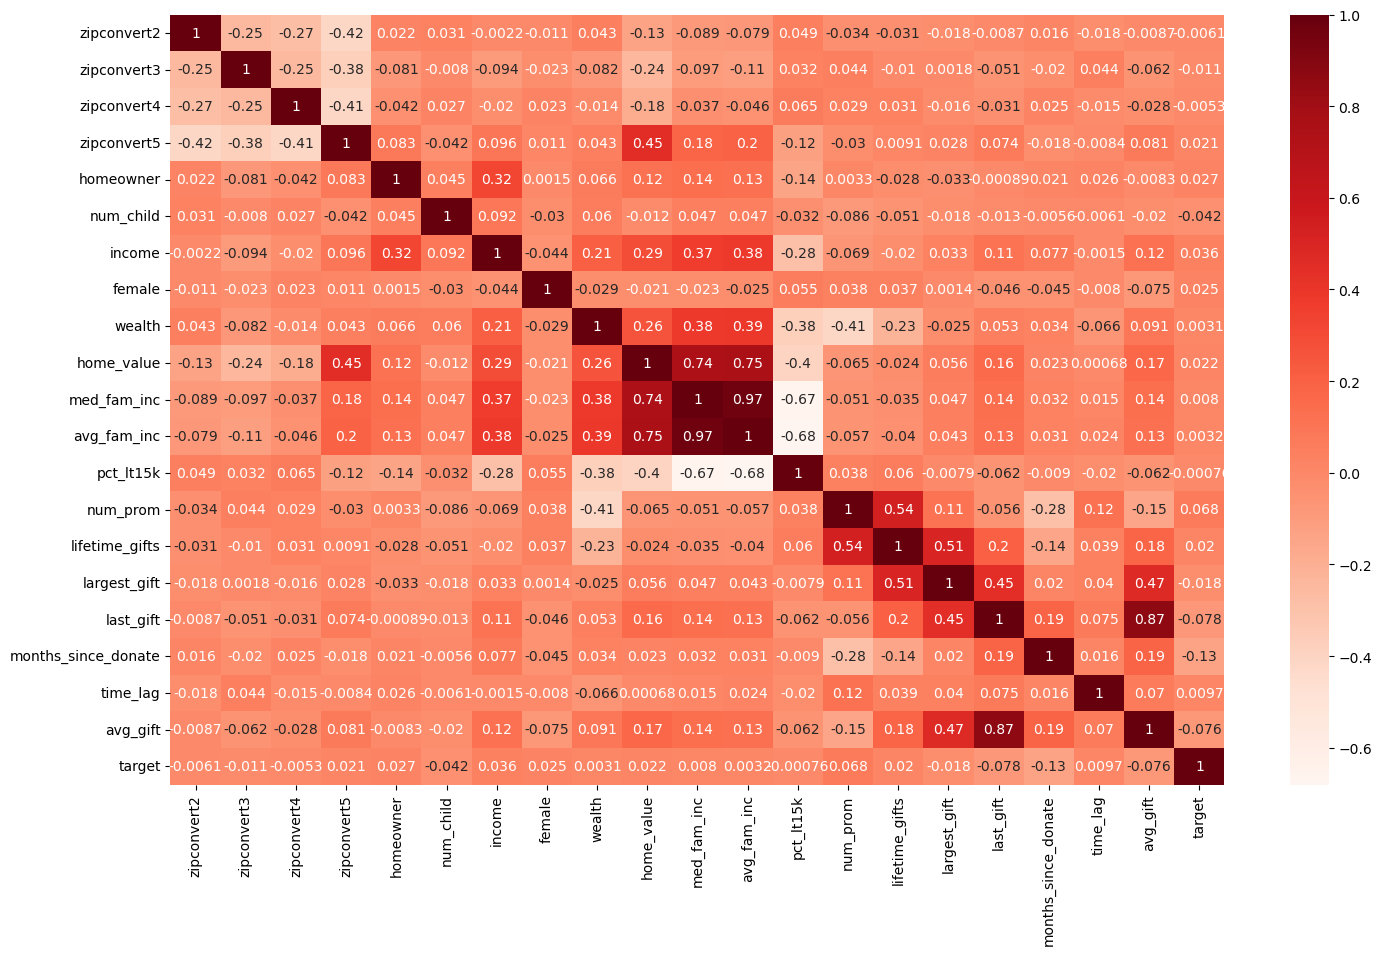

In [70]:
corr_matrix = fr.corr()

# create a heatmap to visualize the correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [71]:
fr.drop(columns=['avg_fam_inc'], inplace=True) 
frf.drop(columns=['avg_fam_inc'], inplace=True) 
fr.drop(columns=['med_fam_inc'], inplace=True) 
frf.drop(columns=['med_fam_inc'], inplace=True) 
fr.drop(columns=['avg_gift'], inplace=True) 
frf.drop(columns=['avg_gift'], inplace=True) 

In [73]:
# Separate features and target
X = fr.drop(columns=["target"])
y = fr["target"]

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Convert class weights to a list
weights = [class_weights[int(cls == "Donor")] for cls in y]

# Create a WeightedRandomSampler
sampler = WeightedRandomSampler(weights, num_samples=len(y))

# Sample indices from the sampler
sample_indices = list(sampler)

# Use the sampled indices to create a balanced training set
X_sampled = X.iloc[sample_indices]
y_sampled = y.iloc[sample_indices]

# Split the sampled dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=1)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Set random seed for reproducibility
random_state_seed = 12345

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model 1: Logistic Regression with regularization and increased max_iter
logreg_model = LogisticRegression(class_weight='balanced',random_state=random_state_seed)
logreg_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=random_state_seed)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_logreg = logreg_model.predict(X_val_scaled)
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the models
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

roc_auc_logreg = roc_auc_score(y_val, logreg_model.predict_proba(X_val_scaled)[:, 1])
roc_auc_rf = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])

conf_matrix_logreg = confusion_matrix(y_val, y_val_pred_logreg)
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)

mse_logreg = mean_squared_error(y_val, y_val_pred_logreg)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)

# Print results
print("Logistic Regression - Accuracy:", accuracy_logreg)
print("Logistic Regression - ROC AUC:", roc_auc_logreg)
print(f"Logistic Regression -  Mean Squared Error (MSE):",mse_logreg)
print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_logreg)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - ROC AUC:", roc_auc_rf)
print(f"Random Forest -  Mean Squared Error (MSE):",mse_rf)
print("Random Forest - Confusion Matrix:")
print(conf_matrix_rf)


Logistic Regression - Accuracy: 0.555
Logistic Regression - ROC AUC: 0.5617277772217218
Logistic Regression -  Mean Squared Error (MSE): 0.445
Logistic Regression - Confusion Matrix:
[[169 122]
 [145 164]]
Random Forest - Accuracy: 0.7966666666666666
Random Forest - ROC AUC: 0.9114592021708426
Random Forest -  Mean Squared Error (MSE): 0.20333333333333334
Random Forest - Confusion Matrix:
[[237  54]
 [ 68 241]]


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val_scaled)

# Calculate the accuracy of the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc_nb = roc_auc_score(y_val, y_val_pred)
conf_matrix_nb = confusion_matrix(y_val, y_val_pred)
mse_nb = mean_squared_error(y_val, y_val_pred)

# Print the accuracy
print("Naive Bayes Model - Accuracy:", accuracy)
print("Naive Bayes Model - ROC AUC:", roc_auc_nb)
print(f"Naive Bayes Model -  Mean Squared Error (MSE):",mse_nb)
print("Naive Bayes Model - Confusion Matrix:")
print(conf_matrix_nb)

Naive Bayes Model - Accuracy: 0.5083333333333333
Naive Bayes Model - ROC AUC: 0.51935074900744
Naive Bayes Model -  Mean Squared Error (MSE): 0.49166666666666664
Naive Bayes Model - Confusion Matrix:
[[258  33]
 [262  47]]


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Set random seed for reproducibility
random_state = 12345

# Model 3: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=random_state)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred_gb = gb_model.predict(X_val_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
roc_auc_gb = roc_auc_score(y_val, gb_model.predict_proba(X_val_scaled)[:, 1])
conf_matrix_gb = confusion_matrix(y_val, y_val_pred_gb)
mse = mean_squared_error(y_val, y_val_pred_gb)

# Print evaluation results
print("Gradient Boosting - Accuracy:", accuracy_gb)
print("Gradient Boosting - ROC AUC:", roc_auc_gb)
print("Gradient Boosting -  Mean Squared Error (MSE):", mse)
print("Gradient Boosting - Confusion Matrix:")
print(conf_matrix_gb)

Gradient Boosting - Accuracy: 0.645
Gradient Boosting - ROC AUC: 0.7004859929492099
Gradient Boosting -  Mean Squared Error (MSE): 0.355
Gradient Boosting - Confusion Matrix:
[[191 100]
 [113 196]]


In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming `fr` (full training data) and `frf` (test data) are already loaded as pandas DataFrames

# Set the random state for reproducibility
random_state_seed = 12345

# Separate the features and target from the full training data
X_full_train = fr.drop(columns=['target'])
y_full_train = fr['target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler with the full training data (`X_full_train`) and transform the full training data
X_full_train_scaled = scaler.fit_transform(X_full_train)

# Transform the future fundraising test data (`frf`) using the fitted StandardScaler
X_test_scaled = scaler.transform(frf)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=random_state_seed)

# Train the Random Forest Classifier with the full training data
rf_model.fit(X_full_train, y_full_train)

# Use the trained Random Forest Classifier to make predictions on the scaled test data
y_test_pred = rf_model.predict(X_test_scaled)

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'Prediction': y_test_pred})

# Save the predictions to a CSV file for submission
submission_df.to_csv('C:/Users/gagss/OneDrive/Documents/spring 2024/Predictive Modelling/Project/submission23.csv', index=False)

print("Predictions saved to submission23.csv")

Predictions saved to submission23.csv


C:\Users\gagss\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the list of models
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(class_weight='balanced', random_state=random_state_seed)},
    {'name': 'Random Forest', 'model': RandomForestClassifier(random_state=random_state_seed)},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier(random_state=random_state_seed)}
]

# Scale the training and validation data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize lists to store the performance metrics
names = []
accuracies = []
roc_aucs = []
mses = []

# Loop through each model
for model_info in models:
    name = model_info['name']
    model = model_info['model']

    # Fit the model
    if name == 'Naive Bayes':
        # Use scaled data for Naive Bayes
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        # Use original data for other models
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    mse = mean_squared_error(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)

    # Print the metrics
    #print(f"{name} - Accuracy: {accuracy}")
    #print(f"{name} - ROC AUC: {roc_auc}")
    #print(f"{name} - Mean Squared Error (MSE): {mse}")
    #print(f"{name} - Confusion Matrix:")
    #print(conf_matrix)
    #print("\n")

    # Store the metrics for plotting
    names.append(name)
    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)
    mses.append(mse)


C:\Users\gagss\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


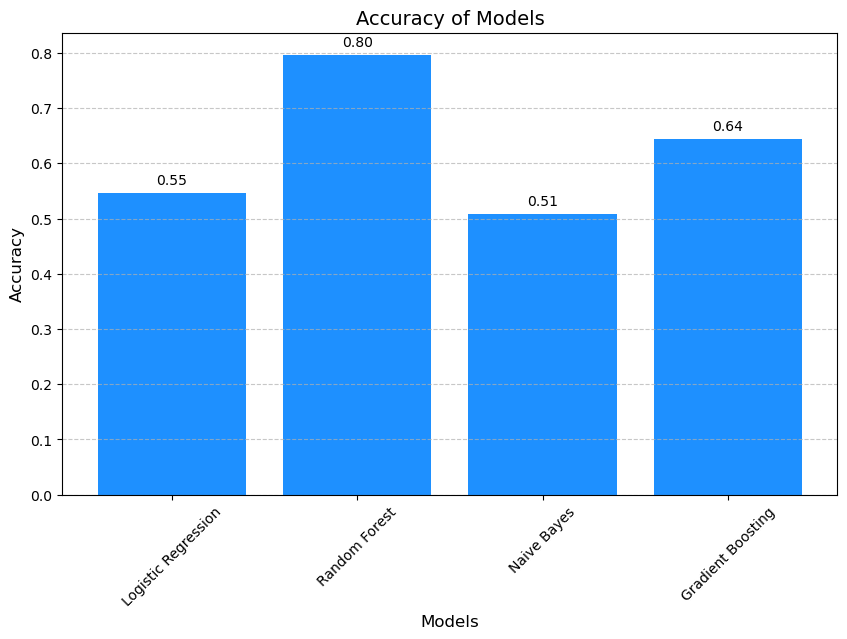

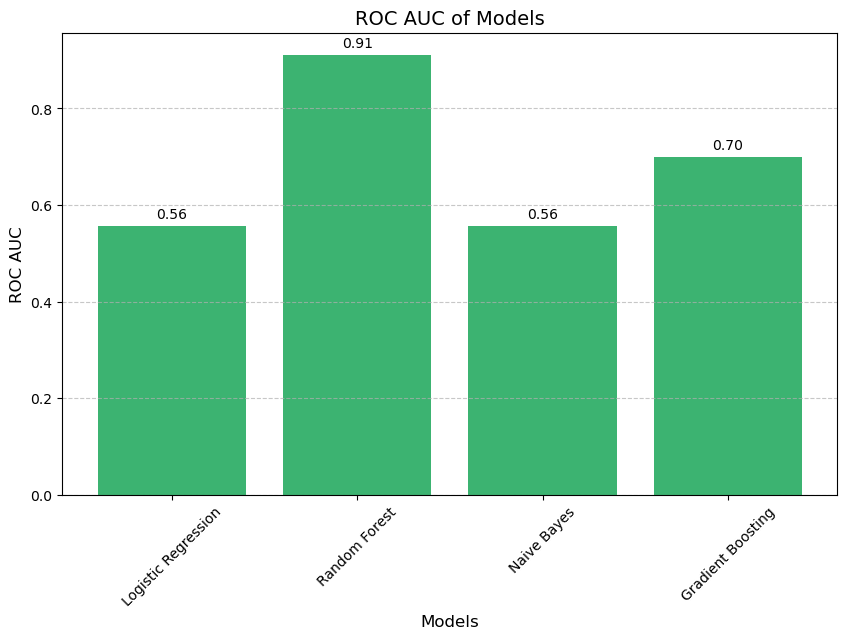

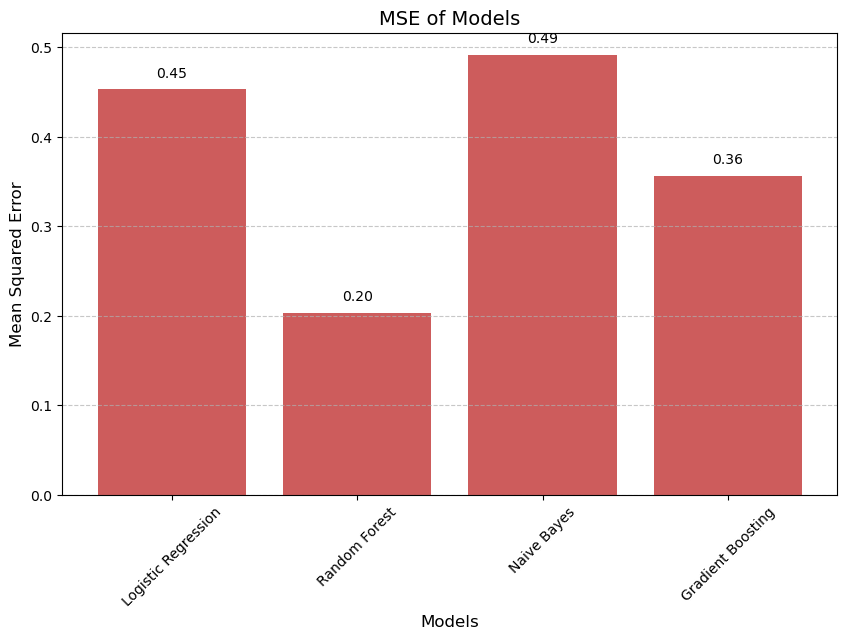

In [58]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define function to plot accuracy of the models
def plot_accuracy(names, accuracies):
    plt.figure(figsize=(10, 6))
    # Plot bar chart
    plt.bar(names, accuracies, color='dodgerblue')
    plt.title('Accuracy of Models', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Models', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    # Annotate bars with their values
    for i, value in enumerate(accuracies):
        plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    plt.show()

# Define function to plot ROC AUC of the models
def plot_roc_auc(names, roc_aucs):
    plt.figure(figsize=(10, 6))
    # Plot bar chart
    plt.bar(names, roc_aucs, color='mediumseagreen')
    plt.title('ROC AUC of Models', fontsize=14)
    plt.ylabel('ROC AUC', fontsize=12)
    plt.xlabel('Models', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    # Annotate bars with their values
    for i, value in enumerate(roc_aucs):
        plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    plt.show()

# Define function to plot mean squared error (MSE) of the models
def plot_mse(names, mses):
    plt.figure(figsize=(10, 6))
    # Plot bar chart
    plt.bar(names, mses, color='indianred')
    plt.title('MSE of Models', fontsize=14)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.xlabel('Models', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    # Annotate bars with their values
    for i, value in enumerate(mses):
        plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    plt.show()


# Plot accuracy of models
plot_accuracy(names, accuracies)

# Plot ROC AUC of models
plot_roc_auc(names, roc_aucs)

# Plot mean squared error of models
plot_mse(names, mses)

